In [163]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from scipy.linalg import hankel

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42


In [138]:
nTrials = 1000
nCond = 8
binSize = 0.025
trialDur = 1
trialBins = np.int(trialDur/binSize)
nT = np.int(trialBins*nTrials)
t = np.arange(0,trialDur*nTrials,binSize)

ntfilt = 10

In [139]:
trialBins

40

In [140]:
# make isi stimulus

trialDur = 1
trialBins = np.int(trialDur/binSize)

stimOrder = random.randint(nCond, size = nTrials)
#stimOrder = np.mod(range(nTrials),2)  # alternating on/off
stimDur = 0.5; # 0.5 for isi, 1 for full duration
stim_isi = np.zeros(nT)
for s in range(len(stimOrder)):
    stim_isi[np.arange(s*trialBins,(s+stimDur)*trialBins, dtype=int)] = stimOrder[s]

padded_stim_isi = np.hstack((np.zeros(ntfilt-1), stim_isi))   # pad early bins of stimulus with zero
design_mat_isi = hankel(padded_stim_isi[:-ntfilt+1], stim[-ntfilt:])    

In [141]:
# make continuous stimulus

trialDur = 0.5
trialBins = np.int(trialDur/binSize)

stimOrder = random.randint(nCond, size = nTrials)
#stimOrder = np.mod(range(nTrials),2)  # alternating on/off
stimDur = 1; # 0.5 for isi, 1 for full duration
stim_cont = np.zeros(nT)
for s in range(len(stimOrder)):
    stim_cont[np.arange(s*trialBins,(s+stimDur)*trialBins, dtype=int)] = stimOrder[s]

padded_stim_cont = np.hstack((np.zeros(ntfilt-1), stim_cont))   # pad early bins of stimulus with zero
design_mat_cont = hankel(padded_stim_cont[:-ntfilt+1], stim[-ntfilt:])    

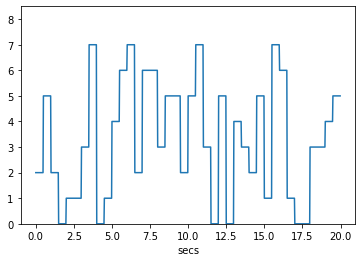

In [177]:
nfrms = 800
plt.plot(np.arange(nfrms)*binSize, stim_cont[0:nfrms])
plt.ylim(0,8.5); plt.xlabel('secs')
plt.savefig('c:\data\eyemovement\cont_stim.pdf')

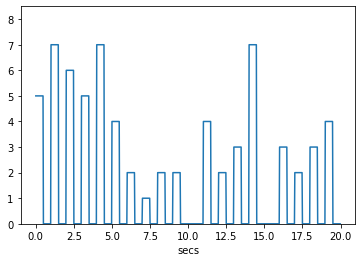

In [178]:
nfrms = 800
plt.plot(np.arange(nfrms)*binSize, stim_isi[0:nfrms])
plt.ylim(0,8.5); plt.xlabel('secs')
plt.savefig('c:\data\eyemovement\isi_stim.pdf')

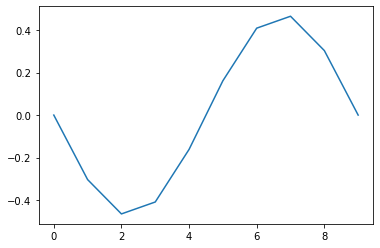

In [169]:
#make filter

#hi tf
filt = np.sin(-np.arange(0,ntfilt) * 2 * np.pi / (ntfilt-1))

# #lowpass
# filt = 0.5*np.sin(np.arange(0,ntfilt) * 2 * np.pi / (2*ntfilt-2))

# #mid
# filt = np.sin(-np.arange(0,ntfilt) * 2 * np.pi / (ntfilt-1))
# filt[0:5]=0.25*filt[0:5]
# filt[0:2]=0

filt = filt / np.sqrt(np.sum(filt**2))
filt = filt

plt.plot(filt)
#plt.savefig('flash_filt.pdf')

Text(0.5, 1.0, 'continuous response by stim')

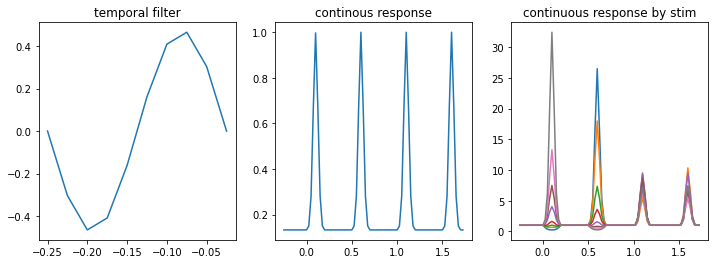

In [170]:
k = 0.5;
out = k * design_mat_isi @ filt
#spikes = out;
#spikes[spikes<0]=0
spikes = np.exp(out)

trialDur = 1
trialBins = np.int(trialDur/binSize)

psth_len = 2*trialBins
psth = np.zeros((nTrials,psth_len))
for s in range(1,nTrials-1):
    psth[s,:] = spikes[np.arange(s*trialBins-trialBins*0.5,(s+1)*trialBins+trialBins*0.5, dtype = int)]
    
mn_psth_isi = np.mean(psth,axis=0)
mn_psth_isi = mn_psth_isi/np.max(mn_psth_isi)
stim_mn_isi = np.zeros((nCond,psth_len))
for s in range(nCond):
    stim_mn_isi[s,:]= np.mean(psth[stimOrder==s,:],axis=0)
    
### continuous
out = k * design_mat_cont @ filt
#spikes = out;
#spikes[spikes<0]=0

spikes = np.exp(out)
trialDur = 0.5
trialBins = np.int(trialDur/binSize)

psth_len = 4*trialBins
psth = np.zeros((nTrials,psth_len))
for s in range(1,nTrials-1):
    psth[s,:] = spikes[np.arange(s*trialBins-trialBins*0.5,(s+3)*trialBins+trialBins*0.5, dtype = int)]
    
mn_psth_cont = np.mean(psth,axis=0)
mn_psth_cont = mn_psth_cont/np.max(mn_psth_cont)

stim_mn_cont = np.zeros((nCond,psth_len))
for s in range(nCond):
    stim_mn_cont[s,:]= np.mean(psth[stimOrder==s,:],axis=0)
    

    
plt.figure(figsize = (12,4))
plt.subplot(1,3,1)
plt.plot(np.arange(-10,0)*binSize,filt); plt.title('temporal filter')
plt.subplot(1,3,2)
plt.plot(np.arange(len(mn_psth_cont))*binSize - trialDur/2,mn_psth_cont); plt.title('continous response')
plt.subplot(1,3,3)
plt.plot(np.arange(len(mn_psth_cont))*binSize- trialDur/2,stim_mn_cont.T); plt.title('continuous response by stim')
#plt.savefig('c:\data\eyemovement\hi_continuous.pdf')

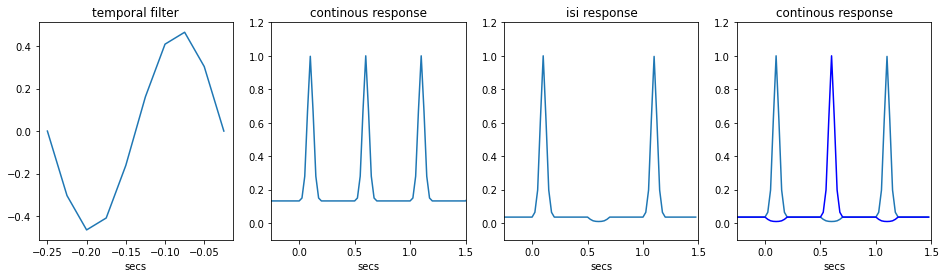

In [171]:
trialDur_isi=1;
trialDur_cont = 0.5
plt.figure(figsize = (16,4))
plt.subplot(1,4,1)
plt.plot(np.arange(-10,0)*binSize,filt); plt.title('temporal filter')
plt.xlabel('secs')

plt.subplot(1,4,2)
plt.plot(np.arange(len(mn_psth_cont))*binSize - trialDur_cont/2,mn_psth_cont); plt.title('continous response')
plt.xlim(-0.25,1.5); plt.ylim(-0.1,1.2); plt.xlabel('secs')

plt.subplot(1,4,3)
plt.plot(np.arange(len(mn_psth_isi))*binSize - trialDur_isi/2,mn_psth_isi); plt.title('isi response')
plt.xlim(-0.25,1.5); plt.ylim(-0.1,1.2); plt.xlabel('secs')

plt.subplot(1,4,4)
plt.plot(np.arange(len(mn_psth))*binSize - trialDur_isi/2,mn_psth_isi);
plt.plot(np.arange(len(mn_psth))*binSize - trialDur_isi/2,np.roll(mn_psth_isi, np.int(trialBins)),'b');
plt.xlim(-0.25,1.5); plt.ylim(-0.1,1.2); plt.xlabel('secs')
plt.title('continous response')


plt.savefig('c:\data\eyemovement\hi_allresp.pdf')

Text(0.5, 1.0, 'continuous response by stim')

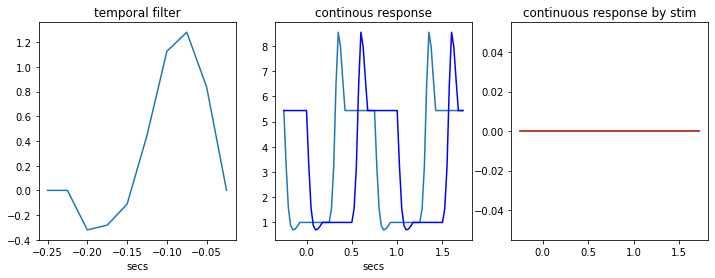

In [132]:
plt.figure(figsize = (12,4))
plt.subplot(1,3,1)
plt.plot(np.arange(-10,0)*binSize,filt); plt.title('temporal filter')
plt.xlabel('secs')
plt.subplot(1,3,2)
plt.plot(np.arange(len(mn_psth))*binSize - trialDur/2,mn_psth);
plt.plot(np.arange(len(mn_psth))*binSize - trialDur/2,np.roll(mn_psth, np.int(trialBins/2)),'b');
plt.xlabel('secs')
plt.title('continous response')
plt.subplot(1,3,3)
plt.plot(np.arange(len(mn_psth))*binSize- trialDur/2,stim_mn.T); plt.title('continuous response by stim')
#plt.savefig('c:\data\eyemovement\hi_continuous.pdf')

(100.0, 250.0)

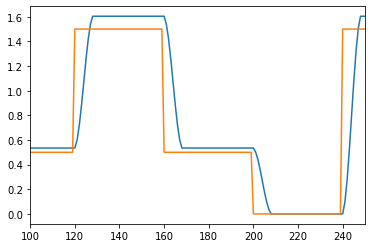

In [25]:
k = 0.2;
out = k * design_mat @ filt
plt.plot(out)
plt.plot(2.5*k*stim)
plt.xlim(100,250)

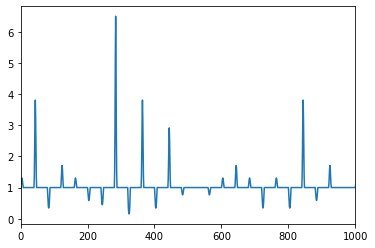

In [398]:
spikes = np.exp(out)
#spikes = out
plt.plot(spikes)
#plt.plot(stim*200)
plt.xlim(0,1000)
plt.savefig('flash_spikes.pdf')

In [337]:
psth_len = 2*trialBins
psth = np.zeros((nTrials,psth_len))
for s in range(1,nTrials-1):
    psth[s,:] = spikes[np.arange(s*trialBins-trialBins*0.5,(s+1)*trialBins+trialBins*0.5, dtype = int)]

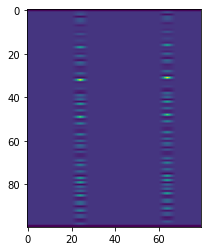

In [338]:
plt.plot(np.exp(np.arange(0,5,0.1)))
plt.savefig('exponential.pdf')

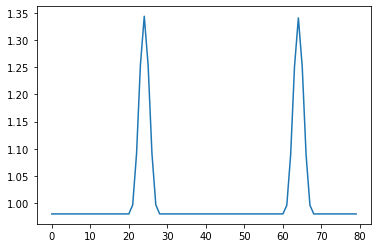

In [339]:
mn_psth = np.mean(psth,axis=0)
plt.plot(mn_psth)

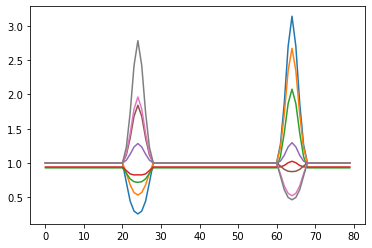

In [340]:
stim_mn = np.zeros((nCond,psth_len))
for s in range(nCond):
    stim_mn[s,:]= np.mean(psth[stimOrder==s,:],axis=0)
plt.plot(stim_mn.T)
    

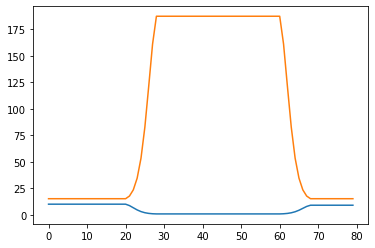

In [407]:
from sklearn.neighbors import KernelDensity

In [430]:
times = random.rand(100)*2
times

array([0.31497115, 1.96012457, 0.65761406, 0.92689289, 1.50822887,
       1.8200577 , 1.9698815 , 1.38013895, 0.08028475, 1.15000883,
       0.68900302, 1.68108583, 1.9204877 , 0.62405893, 0.1300743 ,
       0.68832237, 1.56488119, 1.97540664, 1.05814667, 1.98399234,
       1.35434343, 1.95433523, 1.17875046, 1.95826647, 0.2924238 ,
       0.58403884, 0.07505393, 1.61275212, 1.55883262, 1.76344759,
       1.14626202, 1.74572059, 1.50050865, 1.66488582, 0.39243465,
       0.39959575, 0.29887334, 1.94044344, 0.28955531, 1.37634569,
       1.88918621, 0.73637382, 0.46151655, 0.38304125, 1.72730811,
       1.10692467, 1.90411982, 0.52390764, 0.11124016, 0.4680107 ,
       1.14188254, 0.01244346, 0.03449073, 0.40588517, 0.89119304,
       1.00807821, 0.00433338, 0.89427351, 1.53829826, 1.9793688 ,
       1.08512185, 0.71499999, 0.86969557, 0.59366467, 1.96361811,
       1.58580788, 1.29905224, 1.39079487, 1.34761784, 1.03247515,
       1.63475373, 1.15421464, 0.06695527, 1.7292915 , 0.38827

In [433]:
x = np.arange(0,2,0.0001)

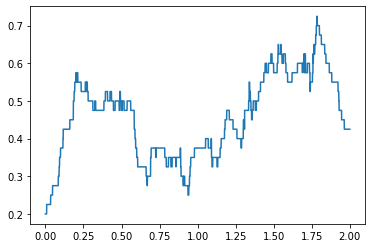

In [434]:
kde = KernelDensity(kernel='tophat', bandwidth=0.2).fit(times[:,np.newaxis])
h = kde.score_samples(x[:,np.newaxis])
plt.plot(x,np.exp(h))